# Part2 Sample the rays

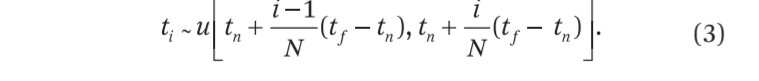

## import libraries

In [100]:
"""
Re‑creates your current world + camera demo and opens a matplotlib window.
Run:  python -m examples.demo_world
"""
import numpy as np
from nerflab import (
    Intrinsics, Camera, Box, Sphere, World, cartesian_to_spherical,
    stratified_samples_batch, plot_world, CFG, pose_H, make_pose_cases
)


In [101]:
# build preset dictionary
cases = make_pose_cases(axis_dist=10)

# pick a view (e.g., diagonal)
H_wc = pose_H(cases["+Z"])  
print(H_wc)

[[ 1.  0. -0.  0.]
 [-0.  1. -0.  0.]
 [ 0.  0.  1. 10.]
 [ 0.  0.  0.  1.]]


In [102]:
# --- camera ------------------------------------------------------------------
intr  = Intrinsics(**CFG.intrinsics.__dict__)
cam   = Camera(intr, H_wc,
               t_bounds=(CFG.rays.t_near, CFG.rays.t_far))

# --- sample rays -------------------------------------------------------------
O_w, D_w = cam.get_rays(frame="world")
t, delta, pts = stratified_samples_batch(
    O_w, D_w, CFG.rays.t_near, CFG.rays.t_far,
    N=CFG.rays.N, deterministic=CFG.rays.deterministic
)
print("points shape:", pts.shape)

# Angles
_, theta, phi = cartesian_to_spherical(pts)
# --- visualise ---------------------------------------------------------------


# cam.plot_rays()

points shape: (307200, 20, 3)


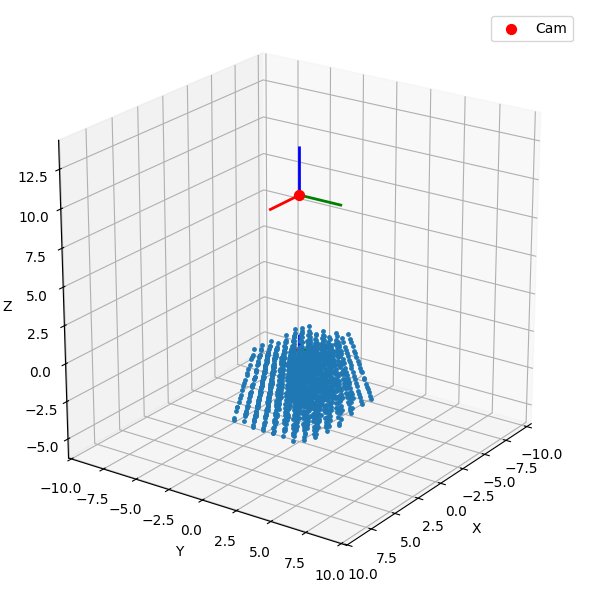

In [103]:
cam.plot_rays(mode='points', points=pts, step=5000)


In [104]:
pts.shape[-1]

3

In [105]:
pts[::5000].shape

(62, 20, 3)

In [106]:
pts.shape

(307200, 20, 3)

In [107]:
pts.reshape(-1,3).shape

(6144000, 3)

In [108]:
pts.reshape(-1,3)[::100].shape

(61440, 3)